In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import OrderedDict
import os
from PIL import Image as im

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import torch
import torch.nn as nn
import gensim
import gensim.downloader as api

## Image AutoEncoder:

In [310]:
## loading the list of images
images = []
for img in os.listdir("images/"):
    images.append(cv2.imread("images/"+img))
images = np.array(images)

C:\Users\OCCURE~1\AppData\Local\Temp/ipykernel_20844/2270189734.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


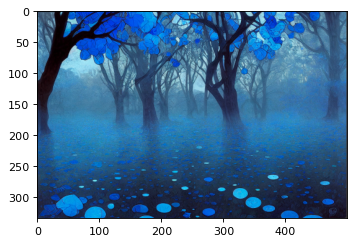

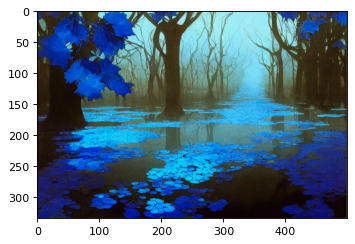

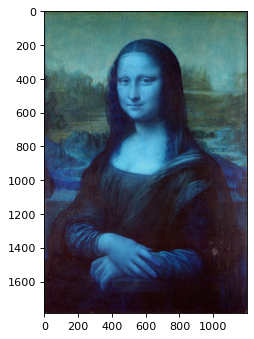

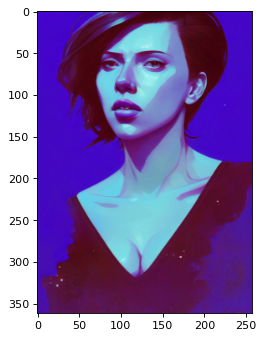

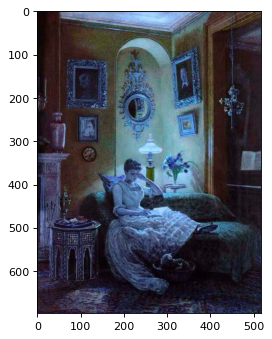

In [311]:
# Show the images that we will be working with
for i in range(images.shape[0]):
    figure(figsize=(5,5), dpi=80)
    plt.imshow(images[i])
    plt.show()

In [312]:
## convert them to gray scale and resize them
for i in range(images.shape[0]):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    images[i] = cv2.resize(images[i], (480,720))

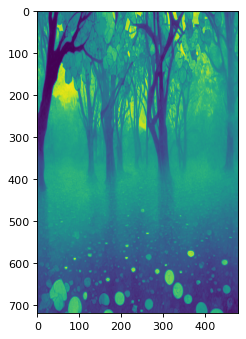

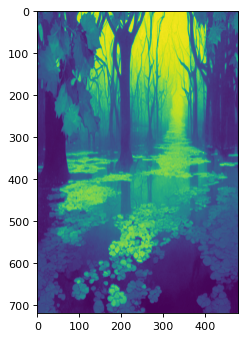

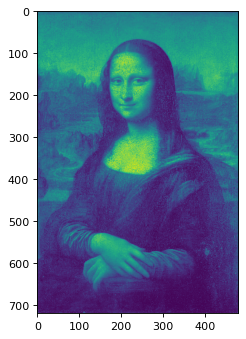

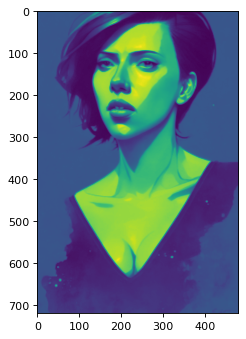

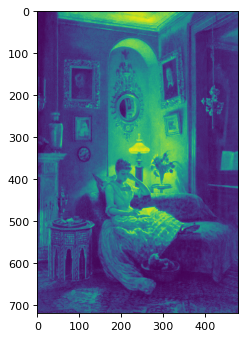

In [313]:
for i in range(images.shape[0]):
    figure(figsize=(5,5), dpi=80)
    plt.imshow(images[i])
    plt.show()

In [314]:
## Convert images from numpy array to tensors
for i in range(images.shape[0]):
    images[i] = torch.tensor(images[i])
    images[i] = images[i].type(torch.FloatTensor) ## convert the thupe to float tensor fon the CNN layer

In [315]:
## testing woth Scalet Johanson's image
img_test = images[3]
print(f"Shape: {img_test.shape}")

Shape: torch.Size([720, 480])


In [447]:
## Testing one CNN layer
conv = nn.Conv1d(720, 500, 3)
out = conv(img_test)

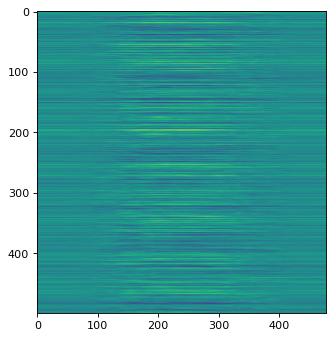

In [448]:
## Show the first convolution result
figure(figsize=(5,5), dpi=80)
plt.imshow(out.detach().numpy())
plt.show()

In [449]:
print(f"Shape of the tensor output: {out.shape}")

Shape of the tensor output: torch.Size([500, 478])


In [450]:
## Building a bigger CNN
model = nn.Sequential(OrderedDict([
    ("conv1", nn.Conv1d(720,500,5)),
    ("relu1", nn.ReLU()),
    ("maxPool1", nn.MaxPool1d(3)),
    ("conv2", nn.Conv1d(500,100,3)),
    ("relu2", nn.ReLU()),
    ("maxPool2", nn.MaxPool1d(3)),
    ("conv3", nn.Conv1d(100,50,3)),
    ("relu3", nn.ReLU()),
    ("maxPool3", nn.MaxPool1d(2)),
]))

In [451]:
out_1 = model(img_test)

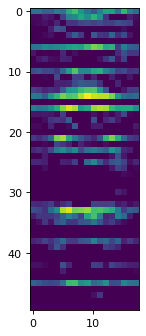

In [376]:
figure(figsize=(5,5), dpi=80)
plt.imshow(out_1.detach().numpy())
plt.show()

In [307]:
class AE_imgs(torch.nn.Module):
    def __init__(self):
        super().__init__()


        self.encoder = nn.Sequential(OrderedDict([
            ("conv1", nn.Conv1d(720,500,64)),
            ("relu1", nn.ReLU()),
            ("dropout1", nn.Dropout(0.1)),
            ("conv2", nn.Conv1d(500,200,8)),
            ("relu2", nn.ReLU()),
            ("dropout2", nn.Dropout(0.1)),
            ("conv3", nn.Conv1d(200,50,1)),
            ("linear", nn.Linear(410,20))
        ]))

        self.decoder = nn.Sequential(OrderedDict([
            ("linear", nn.Linear(20,410)),
            ("conv2", nn.Conv1d(50,200,1)),
            ("dropout2", nn.Dropout(0.1)),
            ("relu2", nn.ReLU()),
            ("conv3", nn.ConvTranspose1d(200,500,8)),
            ("dropout1", nn.Dropout(0.1)),
            ("relu3", nn.ReLU()),
            ("conv4", nn.ConvTranspose1d(500,720,64)),
        ]))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [308]:
# Model Initialization
model_img = AE_imgs()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model_img.parameters(),
                             lr = .0001, weight_decay = .0005)
# Load the model
model_img = torch.load("MLModels/AE_images")

Epochs 1/10
   Loss:  12077.457
   Loss:  10235.581
   Loss:  3768.0288
   Loss:  15360.554
   Loss:  2715.334
Epochs 2/10
   Loss:  4602.737
   Loss:  6992.97
   Loss:  5476.157
   Loss:  8076.3467
   Loss:  4975.6196
Epochs 3/10
   Loss:  7225.657
   Loss:  6325.5317
   Loss:  4378.0244
   Loss:  4519.6597
   Loss:  3150.4084
Epochs 4/10
   Loss:  4141.715
   Loss:  3815.732
   Loss:  3754.295
   Loss:  3787.1653
   Loss:  2397.9705
Epochs 5/10
   Loss:  2570.9675
   Loss:  3412.6323
   Loss:  2654.3552
   Loss:  4719.3105
   Loss:  2603.7905
Epochs 6/10
   Loss:  2525.9263
   Loss:  3090.177
   Loss:  2540.0657
   Loss:  4487.885
   Loss:  2536.468
Epochs 7/10
   Loss:  2254.3284
   Loss:  2562.991
   Loss:  2579.391
   Loss:  3841.14
   Loss:  2285.2737
Epochs 8/10
   Loss:  2280.0234
   Loss:  2551.4375
   Loss:  2911.3972
   Loss:  3598.2512
   Loss:  2381.745
Epochs 9/10
   Loss:  2257.9492
   Loss:  2439.0269
   Loss:  2910.6296
   Loss:  3481.0745
   Loss:  2177.9502
Epochs 10

   Loss:  1059.2429
   Loss:  858.4286
   Loss:  1321.7042
Epochs 75/10
   Loss:  1148.605
   Loss:  1440.8656
   Loss:  809.73425
   Loss:  1246.889
   Loss:  1372.7944
Epochs 76/10
   Loss:  1033.8843
   Loss:  1067.682
   Loss:  853.07355
   Loss:  834.4677
   Loss:  1164.1486
Epochs 77/10
   Loss:  898.9717
   Loss:  1213.2509
   Loss:  779.92267
   Loss:  856.9844
   Loss:  1205.0565
Epochs 78/10
   Loss:  868.9483
   Loss:  1022.06415
   Loss:  728.44543
   Loss:  789.9798
   Loss:  1026.7993
Epochs 79/10
   Loss:  712.136
   Loss:  1267.7109
   Loss:  1063.5675
   Loss:  734.10956
   Loss:  996.8845
Epochs 80/10
   Loss:  717.9496
   Loss:  993.1646
   Loss:  756.175
   Loss:  716.2361
   Loss:  1045.3285
Epochs 81/10
   Loss:  691.8658
   Loss:  998.731
   Loss:  708.8995
   Loss:  812.3367
   Loss:  968.7119
Epochs 82/10
   Loss:  605.6437
   Loss:  880.0737
   Loss:  620.8557
   Loss:  734.349
   Loss:  972.6924
Epochs 83/10
   Loss:  764.0087
   Loss:  849.2176
   Loss:  619

   Loss:  597.7592
   Loss:  582.84406
   Loss:  240.97377
   Loss:  532.4043
Epochs 149/10
   Loss:  636.5476
   Loss:  537.187
   Loss:  289.90857
   Loss:  770.651
   Loss:  744.68225
Epochs 150/10
   Loss:  932.19806
   Loss:  573.3924
   Loss:  354.47388
   Loss:  1288.4104
   Loss:  441.81198
Epochs 151/10
   Loss:  341.955
   Loss:  512.97736
   Loss:  394.97168
   Loss:  1893.9641
   Loss:  679.9343
Epochs 152/10
   Loss:  507.25732
   Loss:  511.1891
   Loss:  675.5881
   Loss:  444.09705
   Loss:  584.13385
Epochs 153/10
   Loss:  417.40366
   Loss:  420.8928
   Loss:  356.9793
   Loss:  1158.9305
   Loss:  640.8596
Epochs 154/10
   Loss:  465.91165
   Loss:  557.455
   Loss:  552.6143
   Loss:  296.05438
   Loss:  498.7163
Epochs 155/10
   Loss:  617.73706
   Loss:  1175.3905
   Loss:  1358.17
   Loss:  259.24893
   Loss:  391.3449
Epochs 156/10
   Loss:  518.36475
   Loss:  473.9417
   Loss:  302.70105
   Loss:  412.4788
   Loss:  453.23657
Epochs 157/10
   Loss:  529.0851


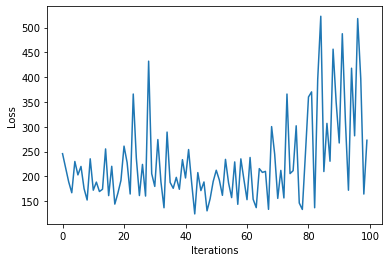

In [936]:
# ## Many images

# epochs = 200
# outputs = []
# losses = []
# for epoch in range(epochs):
#     print(f"Epochs {epoch+1}/10")
#     for image in images:
    

#         # Output of Autoencoder
#         reconstructed = model_img(image)
# #         print("reconstructed shape: ", reconstructed.shape)
#         # Calculating the loss function
#         loss = loss_function(reconstructed, image)
#         print("   Loss: ",loss.detach().numpy())
#         # The gradients are set to zero,
#         # the gradient is computed and stored.
#         # .step() performs parameter update
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Storing the losses in a list for plotting
#         losses.append(loss.detach().numpy())
#     outputs.append((epochs, image, reconstructed))
#     model_img = model_img
# # Defining the Plot Style
# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # Plotting the last 100 values
# plt.plot(losses[-100:])

## One image
# epochs = 150
# outputs = []
# losses = []
# for epoch in range(epochs):
#     print(f"Epochs {epoch+1}/{epochs}")

    

#     # Output of Autoencoder
#     reconstructed = model_img(img_test)
# #         print("reconstructed shape: ", reconstructed.shape)
#     # Calculating the loss function
#     loss = loss_function(reconstructed, img_test)
#     print("   Loss: ",loss.detach().numpy())
#     # The gradients are set to zero,
#     # the gradient is computed and stored.
#     # .step() performs parameter update
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Storing the losses in a list for plotting
#     losses.append(loss.detach().numpy())
#     outputs.append((epochs, img_test, reconstructed))
#     model_img = model_img
# # Defining the Plot Style
# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # Plotting the last 100 values
# plt.plot(losses[-100:])


In [316]:
out_2 = model_img.encoder(images[3])

In [319]:
out_2.shape

torch.Size([50, 20])

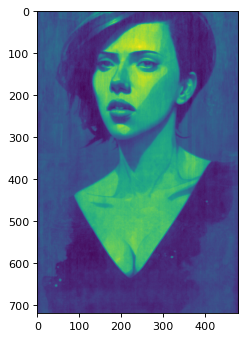

In [49]:
figure(figsize=(5,5), dpi=80)
plt.imshow(out_2.detach().numpy())
plt.show()

## Text AutoEncoder

In [222]:
## Preparing the discriptions
d1 = """
Painting of the Monalisa. Made by the famous Italian painter Leonardo Davinci. It represents a woman 
sitting, looking at the audience and smiling, with mountains in the background.
"""

d2 = """
A drawing of a forest in fall season, at dusk, drowning in a lake full of aquatic plants.
"""

d3 = """
A forest in fall season, at dusk. Realistic painting. Drowning in a lake full of aquatic plants with
a pathway like in front.
"""

d4 = """
Modern Painting of the actress Scarlett Johanson with a red background and smudged paint.
"""

d5 = """
A painting of a woman wearing a dress in the victorian era, sitting on a lounge chair with a lamp 
behind her and reading a book. 
In the background there is a blue wall with pictures around it and a piano
on the right of the painting.
"""

corpus = np.array([d1, d2, d3, d4, d5])

In [223]:
cv = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

features = cv.fit_transform(corpus)

In [224]:
pd.DataFrame(data=features.toarray(), columns=cv.get_feature_names())

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,actress,aquatic,audience,background,blue,book,chair,davinci,drawing,dress,...,right,scarlett,season,sitting,smiling,smudged,victorian,wall,wearing,woman
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,1,0,0,1,...,1,0,0,1,0,0,1,1,1,1


In [225]:
glove = api.load("glove-wiki-gigaword-50")

In [226]:
features.toarray().shape

(5, 48)

In [227]:
vectors = np.zeros((features.toarray().shape[0], features.toarray().shape[1], 50))

In [228]:
vectors.shape

(5, 48, 50)

In [229]:
# vectors = features.toarray().reshape((5,48,1))

In [230]:
for i in range(features.toarray().shape[0]):
    copy = features.toarray()[i]
    for idx in np.argwhere(copy).reshape(1,-1)[0]:
        vectors[i][idx] = glove.get_vector(cv.get_feature_names()[idx])

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [231]:
## Convert images from numpy array to tensors
vect_ten = []
for i in range(vectors.shape[0]):
    vect_ten.append(vectors[i])
#     vect_ten[i] = vect_ten[i].type(torch.DoubleTensor) ## convert the type to Double tensor fon the CNN layer

In [232]:
vect_ten = torch.tensor(np.array(vect_ten))
vect_ten

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.1366,  0.5218,  0.2968,  ..., -0.3718, -0.8102,  0.6351],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [-0.1815,  0.6483, -0.5821,  ..., -1.3138,  0.4876, -0.1047]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.7735,  0.1512, -1.2664,  ..., -0.6665,  0.1612,  0.0622],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.7735,  0.1512, -1.2664,  ..., -0

In [233]:
# for i in range(vect_ten.shape[0]):
#     print(vect_ten[i].type())
#     vect_ten[i] = vect_ten[i].type(torch.FloatTensor)
#     print(vect_ten[i].type())
vect_ten = vect_ten.type(torch.FloatTensor)

In [234]:
vect_ten.shape

torch.Size([5, 48, 50])

In [293]:
class extract_tensor(nn.Module):
    def forward(self,x):
        # Output shape (batch, features, hidden)
#         print(len(x))
        tensor, _ = x
        # Reshape shape (batch, hidden)
        return tensor
    


class AE_corpus(torch.nn.Module):
    def __init__(self):
        super().__init__()


        self.encoder = nn.Sequential(OrderedDict([
            ("lin1", nn.Linear(2400, 1000)),
            ("lin2", nn.Linear(1000, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin3", nn.Linear(500, 100)),
            ("lin4", nn.Linear(100, 50)),
            ("linear", nn.Linear(50,20)),
        ]))

        self.decoder = nn.Sequential(OrderedDict([
            ("linear", nn.Linear(20,50)),
            ("lin4", nn.Linear(50, 100)),
            ("lin3", nn.Linear(100, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin2", nn.Linear(500, 1000)),
            ("lin1", nn.Linear(1000, 2400)),
        ]))

    def forward(self, x):
        encoded = self.encoder(x)
#         print(encoded.shape)
        decoded = self.decoder(encoded)
        return decoded

In [294]:
# Model Initialization
model_corpus = AE_corpus()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model_corpus.parameters(),
                             lr = .0001, weight_decay = .0001)

Epochs 1/500
    Loss: 0.19437861
Epochs 2/500
    Loss: 0.18972333
Epochs 3/500
    Loss: 0.1830882
Epochs 4/500
    Loss: 0.173437
Epochs 5/500
    Loss: 0.16112898
Epochs 6/500
    Loss: 0.14679025
Epochs 7/500
    Loss: 0.13069238
Epochs 8/500
    Loss: 0.113734335
Epochs 9/500
    Loss: 0.101229265
Epochs 10/500
    Loss: 0.08857149
Epochs 11/500
    Loss: 0.07173241
Epochs 12/500
    Loss: 0.06679042
Epochs 13/500
    Loss: 0.058770258
Epochs 14/500
    Loss: 0.057574205
Epochs 15/500
    Loss: 0.05019607
Epochs 16/500
    Loss: 0.049009502
Epochs 17/500
    Loss: 0.03996064
Epochs 18/500
    Loss: 0.03291857
Epochs 19/500
    Loss: 0.02433701
Epochs 20/500
    Loss: 0.01991871
Epochs 21/500
    Loss: 0.015155385
Epochs 22/500
    Loss: 0.013783722
Epochs 23/500
    Loss: 0.012713931
Epochs 24/500
    Loss: 0.014607841
Epochs 25/500
    Loss: 0.01199545
Epochs 26/500
    Loss: 0.017772714
Epochs 27/500
    Loss: 0.011704454
Epochs 28/500
    Loss: 0.00876312
Epochs 29/500
    Los

    Loss: 0.0010243541
Epochs 225/500
    Loss: 0.0014636702
Epochs 226/500
    Loss: 0.0018725119
Epochs 227/500
    Loss: 0.002629081
Epochs 228/500
    Loss: 0.0031535712
Epochs 229/500
    Loss: 0.0048597725
Epochs 230/500
    Loss: 0.008298782
Epochs 231/500
    Loss: 0.0013880221
Epochs 232/500
    Loss: 0.0043131174
Epochs 233/500
    Loss: 0.0030666005
Epochs 234/500
    Loss: 0.00087508286
Epochs 235/500
    Loss: 0.0074628466
Epochs 236/500
    Loss: 0.0015022113
Epochs 237/500
    Loss: 0.003114157
Epochs 238/500
    Loss: 0.0014084713
Epochs 239/500
    Loss: 0.001798062
Epochs 240/500
    Loss: 0.002131319
Epochs 241/500
    Loss: 0.0061210585
Epochs 242/500
    Loss: 0.002299854
Epochs 243/500
    Loss: 0.0018749844
Epochs 244/500
    Loss: 0.0015415151
Epochs 245/500
    Loss: 0.003914637
Epochs 246/500
    Loss: 0.0049352557
Epochs 247/500
    Loss: 0.0033783612
Epochs 248/500
    Loss: 0.008827646
Epochs 249/500
    Loss: 0.006695105
Epochs 250/500
    Loss: 0.00464143

    Loss: 0.0031225574
Epochs 448/500
    Loss: 0.0012281857
Epochs 449/500
    Loss: 0.00082985
Epochs 450/500
    Loss: 0.00095784495
Epochs 451/500
    Loss: 0.0067407
Epochs 452/500
    Loss: 0.004908743
Epochs 453/500
    Loss: 0.0034918825
Epochs 454/500
    Loss: 0.0022852034
Epochs 455/500
    Loss: 0.0015193494
Epochs 456/500
    Loss: 0.0027322068
Epochs 457/500
    Loss: 0.0029785424
Epochs 458/500
    Loss: 0.0015470353
Epochs 459/500
    Loss: 0.0025171135
Epochs 460/500
    Loss: 0.0051864833
Epochs 461/500
    Loss: 0.00096247694
Epochs 462/500
    Loss: 0.0010335019
Epochs 463/500
    Loss: 0.002034215
Epochs 464/500
    Loss: 0.0025161535
Epochs 465/500
    Loss: 0.002433296
Epochs 466/500
    Loss: 0.00030541624
Epochs 467/500
    Loss: 0.009006017
Epochs 468/500
    Loss: 0.0022954068
Epochs 469/500
    Loss: 0.004135407
Epochs 470/500
    Loss: 0.0037417826
Epochs 471/500
    Loss: 0.003874011
Epochs 472/500
    Loss: 0.0016096921
Epochs 473/500
    Loss: 0.00485290

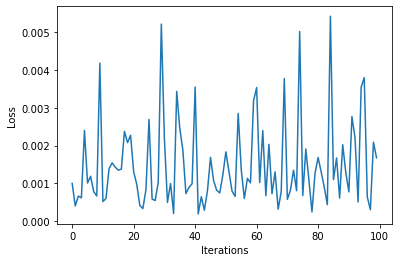

In [295]:
# ## Many texts

device = torch.device("cuda")
epochs = 500
outputs = []
losses = []
vect_ten = vect_ten.to(device)
model_corpus = model_corpus.to(device)
for epoch in range(epochs):
    print(f"Epochs {epoch+1}/{epochs}")
    for text in vect_ten:
        val_loss = []

        # Output of Autoencoder
        reconstructed = model_corpus(text.reshape(1,-1))
#         print("reconstructed shape: ", reconstructed.shape)
        # Calculating the loss function
        loss = loss_function(reconstructed, text.reshape(1,-1))
        val_loss.append(loss.cpu().detach().numpy())
#         print("   Loss: ",loss.detach().numpy())
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.cpu().detach().numpy())
    print("    Loss:", np.array(val_loss).mean())
    outputs.append((epochs, text, reconstructed))
# Defining the Plot Style
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

## One text
# device = torch.device("cuda")
# epochs = 10
# outputs = []
# losses = []
# vect_ten = vect_ten.to(device)
# model_corpus = model_corpus.to(device)
# for epoch in range(epochs):
#     print(f"Epochs {epoch+1}/{epochs}")

    

#     # Output of Autoencoder
#     reconstructed = model_corpus(vect_ten[0])
# #         print("reconstructed shape: ", reconstructed.shape)
#     # Calculating the loss function
#     loss = loss_function(reconstructed, vect_ten[0])
#     print("   Loss: ",loss.detach().numpy())
#     # The gradients are set to zero,
#     # the gradient is computed and stored.
#     # .step() performs parameter update
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Storing the losses in a list for plotting
#     losses.append(loss.detach().numpy())
#     outputs.append((epochs, vect_ten[0], reconstructed))
# # Defining the Plot Style
# plt.xlabel('Iterations')
# plt.ylabel('Loss')

# # Plotting the last 100 values
# plt.plot(losses[-100:])

In [300]:
out_t = model_corpus(vect_ten[0].reshape(1,-1)) 

In [305]:
out = model_corpus.encoder(vect_ten[0].reshape(1,-1))

In [306]:
out.shape

torch.Size([1, 20])

In [301]:
out_t

tensor([[-0.0135,  0.0529, -0.0156,  ..., -1.2784,  0.4621, -0.0884]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [302]:
vect_ten[0].reshape(1,-1)

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -1.3138,  0.4876, -0.1047]],
       device='cuda:0')

In [303]:
nn.CosineSimilarity()(vect_ten[0].reshape(1,-1), out_t).mean()

tensor(0.9965, device='cuda:0', grad_fn=<MeanBackward0>)

## Tests

In [10]:
inputs = torch.randn((50,48,50))

In [201]:
class extract_tensor(nn.Module):
    def forward(self,x):
        # Output shape (batch, features, hidden)
#         print(len(x))
        tensor, _ = x
        # Reshape shape (batch, hidden)
        return tensor
    


class AE_rnn(torch.nn.Module):
    def __init__(self):
        super().__init__()


        self.encoder = nn.Sequential(OrderedDict([
            ("lin1", nn.Linear(2400, 1000)),
            ("lin2", nn.Linear(1000, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin3", nn.Linear(500, 100)),
            ("lin4", nn.Linear(100, 50)),
            ("linear", nn.Linear(50,20)),
        ]))

        self.decoder = nn.Sequential(OrderedDict([
            ("linear", nn.Linear(20,50)),
            ("lin4", nn.Linear(50, 100)),
            ("lin3", nn.Linear(100, 500)),
            ("dp", nn.Dropout(.2)),
            ("lin2", nn.Linear(500, 1000)),
            ("lin1", nn.Linear(1000, 2400)),
        ]))

    def forward(self, x):
        encoded = self.encoder(x)
#         print(encoded.shape)
        decoded = self.decoder(encoded)
        return decoded

In [202]:
# Model Initialization
model = AE_rnn()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(),
                             lr = .0001, weight_decay = .0001)

In [203]:
inputs

tensor([[[-0.4213,  0.5032, -0.9813,  ..., -1.2242,  0.1477, -0.5879],
         [-1.4297,  0.5851,  0.8094,  ...,  1.4513, -1.0987, -0.1834],
         [-0.1795,  0.4366,  0.3572,  ..., -0.3366, -0.7753,  0.9781],
         ...,
         [ 0.8604, -0.1523,  0.1195,  ..., -0.2608, -0.4778, -0.4324],
         [ 0.8739, -0.2883, -1.4304,  ..., -0.0308, -0.9518,  2.4559],
         [-0.1809, -0.7648, -1.2175,  ..., -0.7321, -0.5478,  0.3206]],

        [[-0.5037, -1.2613, -0.6398,  ...,  0.7581, -0.5656,  0.7903],
         [-0.8026, -0.6898,  0.3690,  ..., -0.7337,  0.5870, -1.6020],
         [-0.3858, -0.3737,  0.1428,  ..., -1.1676, -0.5285, -1.7995],
         ...,
         [ 0.0937, -2.6857, -2.2778,  ..., -0.3770,  0.4946,  0.4563],
         [ 1.1465, -0.0914, -0.9830,  ...,  0.4905,  1.5571,  0.1266],
         [-0.4818,  0.2176,  1.2187,  ...,  0.1826, -0.5543,  0.3378]],

        [[ 0.6687,  0.8981,  1.2488,  ..., -0.2808,  0.0804,  0.6326],
         [-0.1184, -2.2335, -1.6620,  ...,  1

Epochs 1/50
    Loss: 0.8789621
Epochs 2/50
    Loss: 0.8796224
Epochs 3/50
    Loss: 0.88112044
Epochs 4/50
    Loss: 0.8778634
Epochs 5/50
    Loss: 0.87508565
Epochs 6/50
    Loss: 0.87514883
Epochs 7/50
    Loss: 0.88097537
Epochs 8/50
    Loss: 0.87773156
Epochs 9/50
    Loss: 0.8735167
Epochs 10/50
    Loss: 0.8747701
Epochs 11/50
    Loss: 0.8734328
Epochs 12/50
    Loss: 0.87513757
Epochs 13/50
    Loss: 0.875835
Epochs 14/50
    Loss: 0.87540823
Epochs 15/50
    Loss: 0.8753764
Epochs 16/50
    Loss: 0.8771123
Epochs 17/50
    Loss: 0.8740135
Epochs 18/50
    Loss: 0.8781034
Epochs 19/50
    Loss: 0.8731332
Epochs 20/50
    Loss: 0.875248
Epochs 21/50
    Loss: 0.8733059
Epochs 22/50
    Loss: 0.87737346
Epochs 23/50
    Loss: 0.88265646
Epochs 24/50
    Loss: 0.873104
Epochs 25/50
    Loss: 0.87672794
Epochs 26/50
    Loss: 0.8751186
Epochs 27/50
    Loss: 0.87385136
Epochs 28/50
    Loss: 0.87337476
Epochs 29/50
    Loss: 0.87026876
Epochs 30/50
    Loss: 0.8724864
Epochs 31

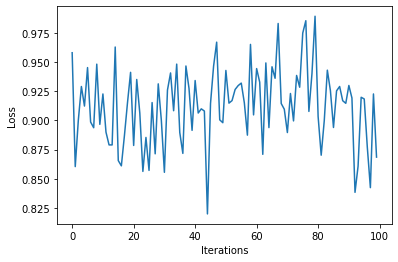

In [214]:
## Many texts
device = torch.device("cuda")
epochs = 50
outputs = []
losses = []
inputs = inputs.to(device)
model = model.to(device)

for epoch in range(epochs):
    print(f"Epochs {epoch+1}/{epochs}")

    for text in inputs:
        val_loss = []

        # Output of Autoencoder
        reconstructed = model.to(device)(text.reshape(1,-1))
#         print("reconstructed shape: ", reconstructed.shape)
        # Calculating the loss function
#         sim_tensor = nn.CosineSimilarity()(reconstructed, text.reshape(1,-1)).float()
#         loss = loss_function(reconstructed, text.reshape(1,-1), torch.where(sim_tensor > 0.5, 1, -1))
        loss = loss_function(reconstructed, text.reshape(1,-1))
        val_loss.append(loss.cpu().detach().numpy())
#         print("   Loss: ",loss.detach().numpy())
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.cpu().detach().numpy())
    print("    Loss:", np.array(val_loss).mean())
    outputs.append((epochs, text, reconstructed))
# Defining the Plot Style
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

In [215]:
outputs = model(inputs[0].reshape(1,-1))

In [216]:
inputs[0].reshape(1,-1)

tensor([[-0.4213,  0.5032, -0.9813,  ..., -0.7321, -0.5478,  0.3206]],
       device='cuda:0')

In [217]:
outputs

tensor([[ 0.0745, -0.1902,  0.3205,  ..., -0.3730,  0.0949, -0.0880]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [218]:
nn.CosineSimilarity()(inputs[0].reshape(1,-1), outputs).mean()

tensor(0.2702, device='cuda:0', grad_fn=<MeanBackward0>)

In [28]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos(input1, input2)

In [118]:
output

tensor([ 0.0761,  0.2710,  0.1194,  0.0196,  0.0250,  0.0427,  0.1313,  0.1384,
        -0.0751,  0.1507, -0.0970, -0.1725,  0.0677,  0.0901,  0.0102,  0.1673,
         0.0259,  0.1827,  0.0778,  0.0503, -0.1271,  0.0584, -0.0806, -0.0273,
        -0.0655,  0.0785, -0.0982, -0.1410, -0.0455,  0.0217,  0.1471, -0.0371,
         0.0262,  0.1120, -0.0277, -0.2440,  0.1464,  0.0066, -0.1917,  0.0063,
        -0.0831, -0.0804,  0.0291,  0.0798,  0.0103, -0.0559, -0.0948, -0.1033,
        -0.0563,  0.0931,  0.0402,  0.0045,  0.0615,  0.1064, -0.1899, -0.0747,
        -0.0599, -0.0230,  0.0835, -0.0594,  0.0614,  0.0282,  0.0217,  0.0589,
         0.1964, -0.0617, -0.1582, -0.0237,  0.0011,  0.0537,  0.1075, -0.0957,
        -0.0733,  0.0325, -0.1894, -0.1318,  0.0238, -0.0946,  0.0914,  0.0123,
        -0.0454,  0.1305, -0.0338, -0.0014, -0.1285,  0.1236, -0.2224,  0.0962,
        -0.0887,  0.0195, -0.0307, -0.1493,  0.0485, -0.0357, -0.0422, -0.0950,
        -0.0895,  0.0961,  0.1206, -0.02

In [127]:
torch.where(output > 0.5, 1, -1)

tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])